##**TEAM:**
* Uma Maheshwari [C0928443]
* Jharana Adhikari [C0927442]
* Yasaswin Palukuri [C0928450]
* Raemil Corniel [C0922799]


##**Topic**

###Credit Card Fraud Detection

####**Dataset Details:**

Source: https://www.kaggle.com/datasets/mishra5001/credit-card/data

**I. About:**
- Get insights of the loan defaultes
- Get insights into customer spending behavior and loan defaulters.
- Identify patterns in credit usage, payments, and purchases.
- Perform customer segmentation to group similar spending profiles.
- Help financial institutions optimize marketing strategies and risk management.

**II. Problem statement**
- Financial institutions need to understand customer spending and repayment behavior to provide better credit offerings.
- The dataset helps in identifying potential defaulters by analyzing credit usage patterns.
- Dimensionality reduction (PCA) and clustering techniques can uncover hidden patterns in customer transactions.
- The goal is to segment customers for personalized financial products and risk assessment.

**III. Dataset Information**









### **Assignment**


Part I
1. Sample a subset of the data based on class label
2. Apply PCA and LDA and visualize the results
3. Perform classification using naïve Bayes and interpret the results
4. Perform classification using Logistic Regression and interpret the results
5. Perform classification using SVMs and interpret the results

6. Comment on which approaches might allow you to best identify the confidence of class assignments (e.g. how happy, or how sad rather than just a label)
7. Plot results based on the approach in f.

Part II
1. Apply PCA and LDA. For PCA, plot the incremental gain in capturing the variance in the data for each successive principal component that is added and compare this with the subset of data in step 1.
2. Perform classification using naïve Bayes and interpret and visualize the results
3. Perform classification using Logistic Regression and interpret and visualize the results
4. Perform classification using SVMs and interpret and visualize the results
5. Discuss which classes are most similar / different with some justification given
6. Explain how you might identify faces that are mislabeled in the dataset and provide an implementation.

* Optional

Based on a 7-dimensional vector of confidence values for face identity, plot the position of these in a 2D embedding. The “points” that are shown should be the actual face images within the plot.



# 1. Import libraries


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split




# 2. Load data

In [2]:
application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')


In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Exploration Analysis

In [5]:

print(f"application_data shape: {application_data.shape}")
print(f"previous_application shape: {previous_application.shape}")

application_data shape: (64030, 122)
previous_application shape: (149676, 37)


In [6]:
#identify null values for the application_dataset

application_data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,8600
AMT_REQ_CREDIT_BUREAU_WEEK,8600
AMT_REQ_CREDIT_BUREAU_MON,8600
AMT_REQ_CREDIT_BUREAU_QRT,8600


In [7]:
#identify null values for the previous_application_dataset

previous_application.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,31910
AMT_APPLICATION,0
AMT_CREDIT,0
AMT_DOWN_PAYMENT,76380
AMT_GOODS_PRICE,32667
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


In [8]:
previous_application['NAME_CONTRACT_TYPE'].unique()


array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [9]:
previous_application['NAME_CONTRACT_TYPE'].value_counts()


,count
NAME_CONTRACT_TYPE,
Consumer loans,69318
Cash loans,63130
Revolving loans,17202
XNA,26




> NAME_CONTRACT_TYPE shows the type of loan the client has or had at the current time. Since all datasets are related to a loan, this column does not add meaningful value to our process. This column will be dropped, and XNA rows will be deleted since it is a loan type non-identified.

Also the following columns does not add value to our dataset since are customer personal information or data related to time

WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
NFLAG_MICRO_CASH

NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
NAME_PAYMENT_TYPE

NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL




> Finally our previous application dataset will contain only


SK_ID_PREV
SK_ID_CURR

AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_DOWN_PAYMENT
AMT_GOODS_PRICE

RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
CODE_REJECT_REASON






In [10]:
columns_to_keep_previous_application = [
    'SK_ID_PREV', 'SK_ID_CURR',
    'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
    'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'CODE_REJECT_REASON'
]

#show columns to keep
previous_application[columns_to_keep_previous_application]



,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CODE_REJECT_REASON
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,0.0,0.182832,0.867336,XAP
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,XAP
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,NaN,NaN,NaN,XAP
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,NaN,NaN,NaN,XAP
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,HC
...,...,...,...,...,...,...,...,...,...,...,...
149671,1471054,408198,29089.980,450000.0,604656.0,NaN,450000.0,NaN,NaN,NaN,HC
149672,1052630,104218,11250.000,0.0,225000.0,NaN,0.0,NaN,NaN,NaN,XAP
149673,1582496,300338,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,XAP
149674,1821723,318915,5738.400,54000.0,57564.0,NaN,54000.0,NaN,NaN,NaN,XAP


Let's check the application_data to identify the null values, and columns that might be relevant for our work

In [11]:
application_data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,8600
AMT_REQ_CREDIT_BUREAU_WEEK,8600
AMT_REQ_CREDIT_BUREAU_MON,8600
AMT_REQ_CREDIT_BUREAU_QRT,8600


In [12]:
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Show dataset info
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64030 entries, 0 to 64029
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 59.6+ MB




> After analyzing each column and the meaning of its value we notice a big chunk is related to personal information like:


NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH



> which is not relevant for us at the moment since we already have the previous application of the user, therefore we can use part of that dataset along with a few columns of the application dataset, which are related a relevant info like amount of properties owned, days employed, target column which will help us identify if default or not.

Columns to keep

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE

FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE

DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH

AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR




In [13]:
columns_to_keep_application = [
    'SK_ID_CURR',
    'TARGET',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_EMPLOYED',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]


application_data[columns_to_keep_application]

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,N,Y,0,202500.0,406597.5,24700.5,351000.0,-637,-3648.0,-2120,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,N,N,0,270000.0,1293502.5,35698.5,1129500.0,-1188,-1186.0,-291,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Y,Y,0,67500.0,135000.0,6750.0,135000.0,-225,-4260.0,-2531,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,N,Y,0,135000.0,312682.5,29686.5,297000.0,-3039,-9833.0,-2437,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,N,Y,0,121500.0,513000.0,21865.5,513000.0,-3038,-4311.0,-3458,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64025,174240,0,N,N,0,173353.5,540360.0,15484.5,427500.0,-2185,-2312.0,-640,0.0,0.0,0.0,0.0,0.0,0.0
64026,174241,0,Y,Y,0,135000.0,1264500.0,37102.5,1264500.0,-2886,-3946.0,-673,0.0,0.0,0.0,0.0,0.0,5.0
64027,174242,0,Y,Y,0,270000.0,900000.0,45000.0,900000.0,-1406,-9733.0,-3069,0.0,0.0,0.0,0.0,0.0,0.0
64028,174243,0,Y,Y,0,202500.0,981000.0,28813.5,981000.0,-4474,-826.0,-1714,0.0,0.0,0.0,0.0,1.0,1.0


# Visualize the data to gain more insights

<Figure size 1600x1200 with 0 Axes>

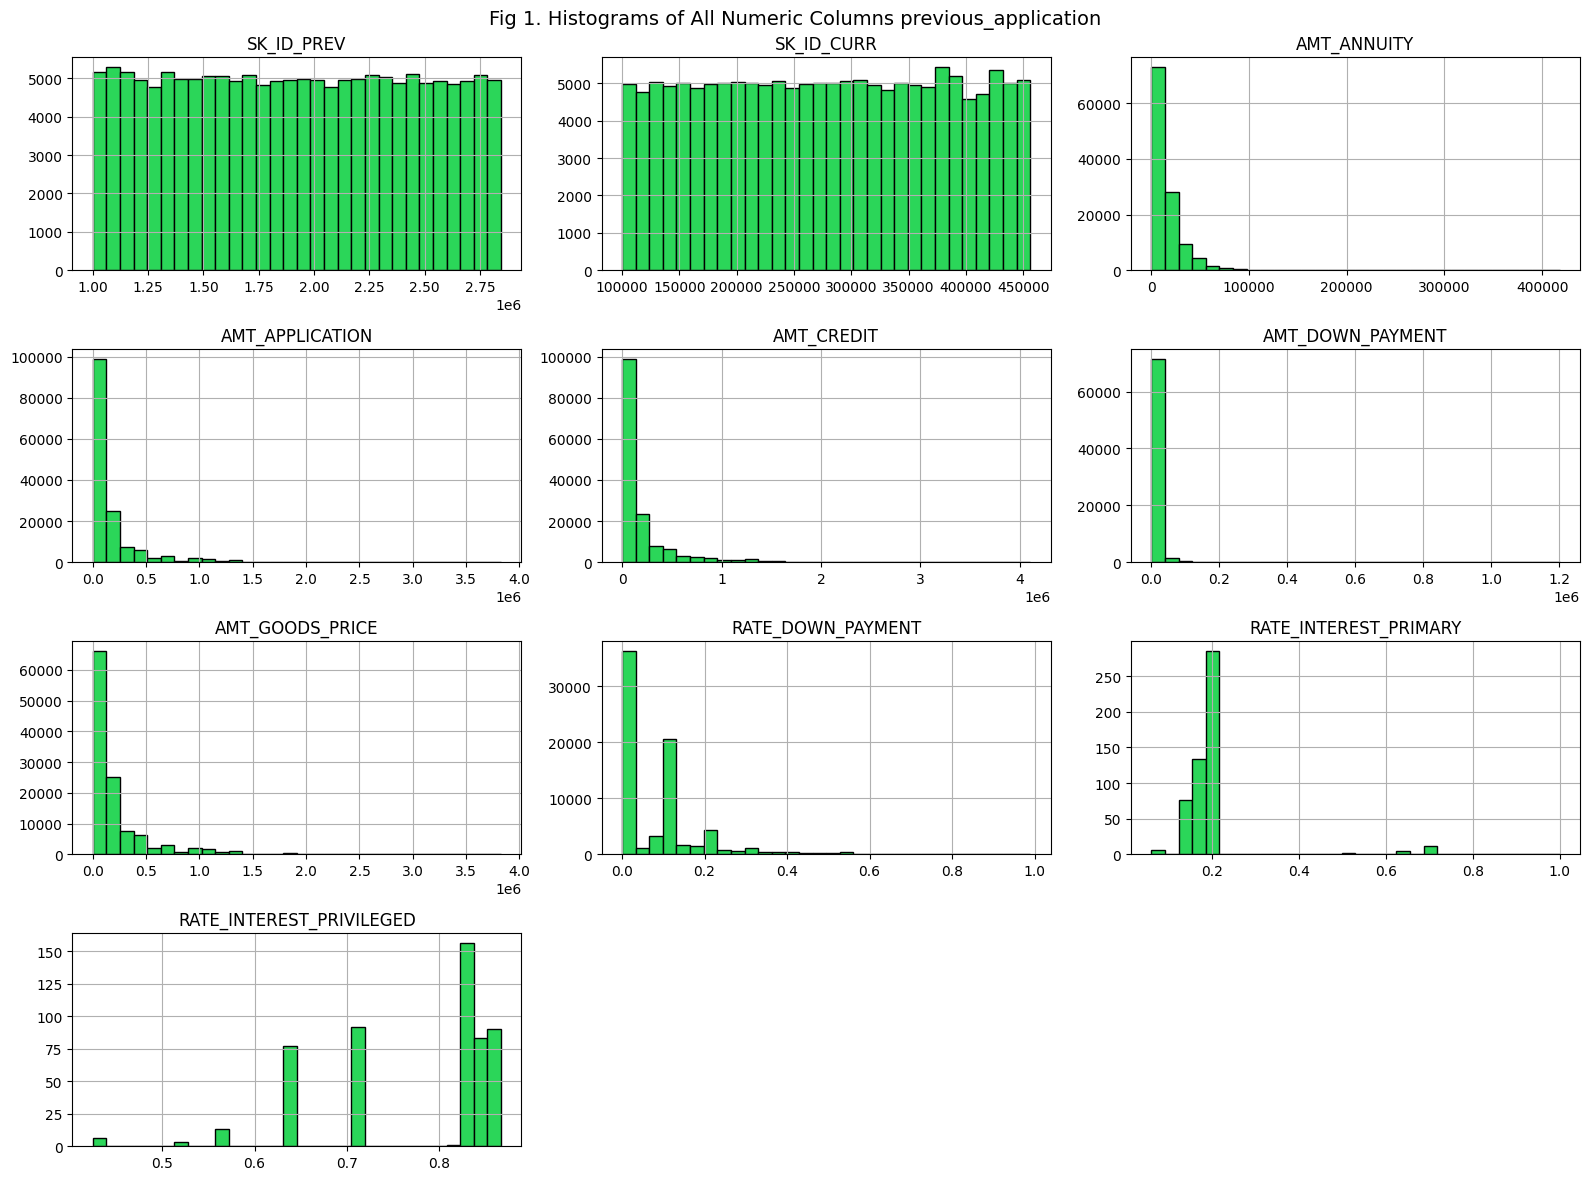

In [97]:
#Histogram of the whole dataset

# Plot histograms for all numeric columns in the dataset
plt.figure(figsize=(16, 12))

# Plot the histograms
previous_application[columns_to_keep_previous_application].hist(bins=30, figsize=(16, 12), color='#2bd659', edgecolor='black')

# Customize the plot
plt.suptitle("Fig 1. Histograms of All Numeric Columns previous_application", fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1600x1200 with 0 Axes>

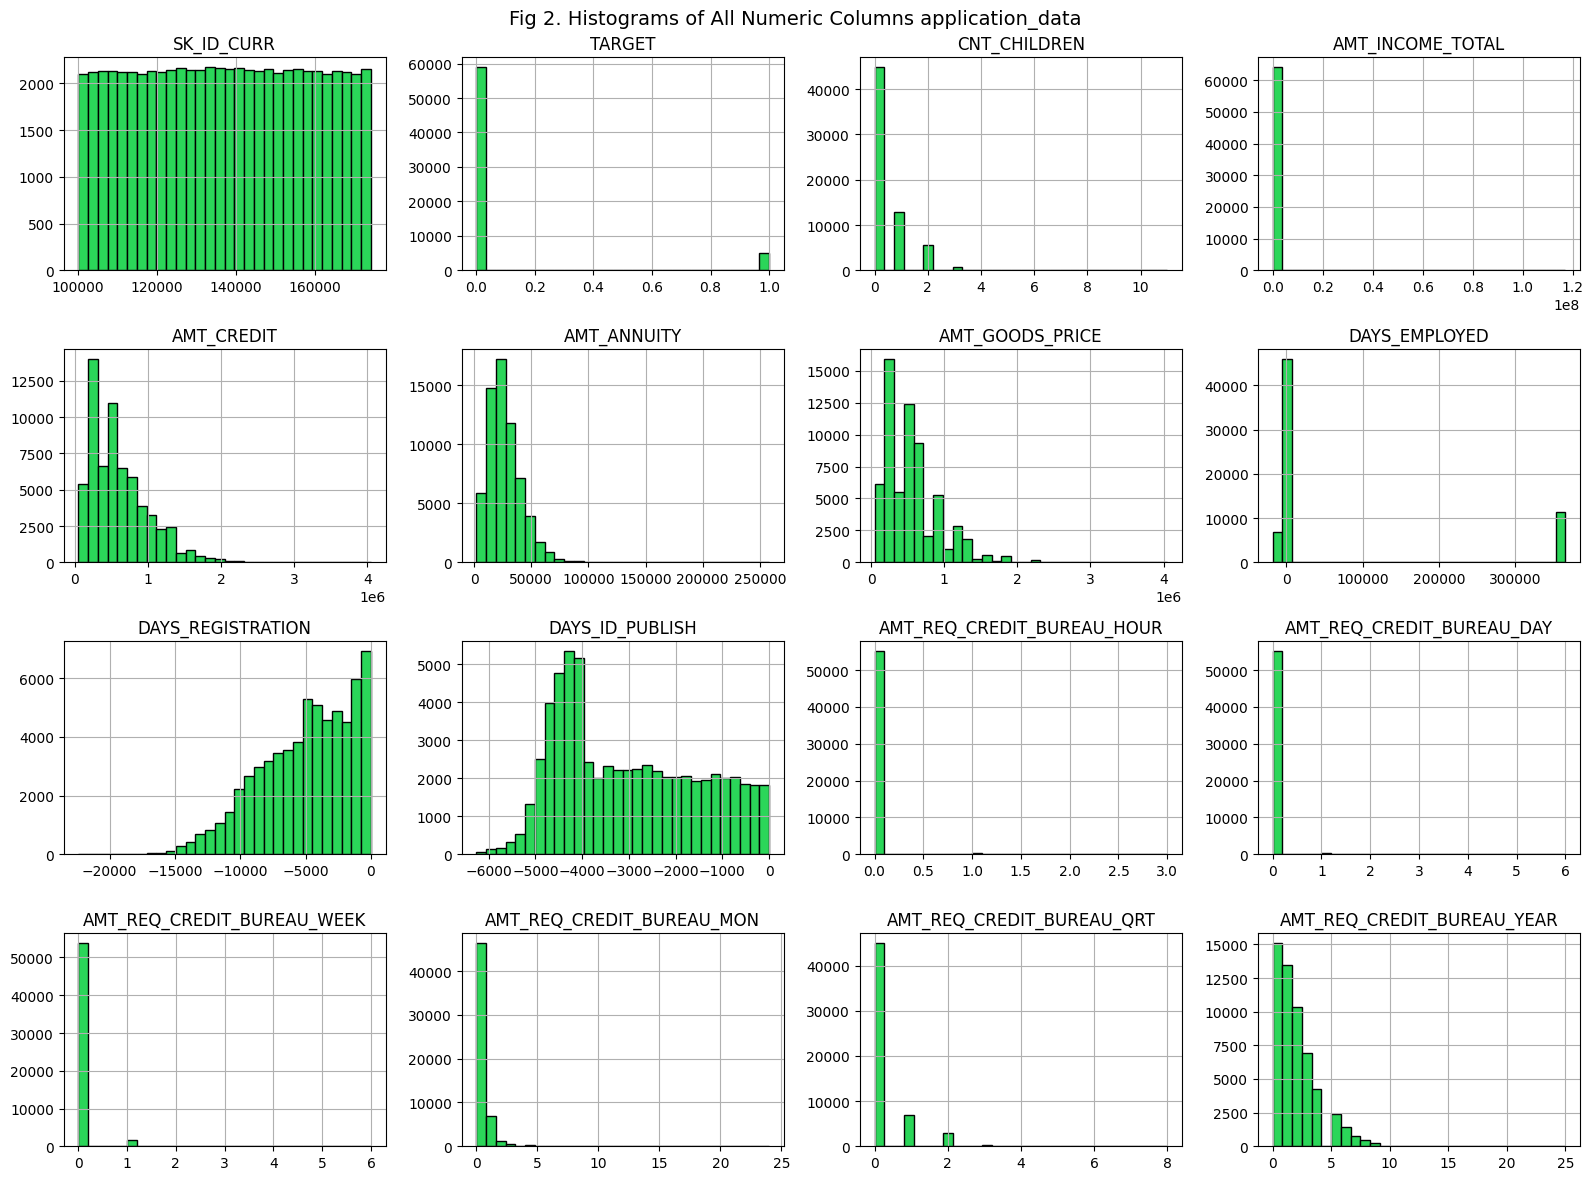

In [98]:
#Histogram of the whole dataset

# Plot histograms for all numeric columns in the dataset
plt.figure(figsize=(16, 12))

# Plot the histograms
application_data[columns_to_keep_application].hist(bins=30, figsize=(16, 12), color='#2bd659', edgecolor='black')

# Customize the plot
plt.suptitle("Fig 2. Histograms of All Numeric Columns application_data", fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

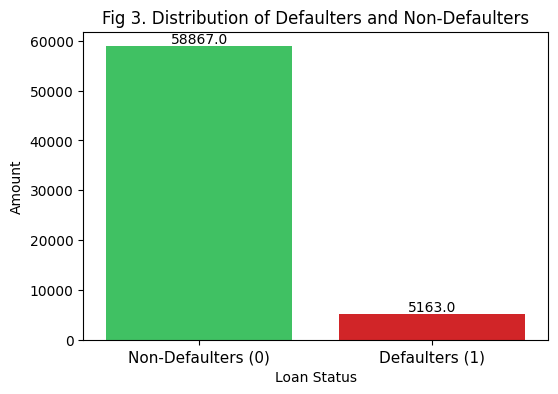

In [99]:
#show the distribution of our data defaulters and not defaulters


# Set figure size
plt.figure(figsize=(6, 4))

# Define color palette
colors = {0:'#2bd659', 1:'#ed090d'}  # Purple for Not Defaulters, Red for Defaulters

# Create the count plot
ax = sns.countplot(x='TARGET', data=application_data, hue='TARGET', palette=colors, legend=False)

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Customize title
plt.title("Fig 3. Distribution of Defaulters and Non-Defaulters", fontsize=12, color='black')

# Customize axis labels
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Amount", fontsize=10)

# Customize x-tick labels
ax.set_xticks([0, 1])  # Set tick positions
ax.set_xticklabels(["Non-Defaulters (0)", "Defaulters (1)"], fontsize=11)

# Show the plot
plt.show()




> A quick look at our target dataset (TARGET) reveals that it is imbalanced, meaning one class significantly outweighs the other. In this case, the majority of users are non-defaulters (TARGET = 0), while a much smaller portion are defaulters (TARGET = 1).


In [41]:
#users that already have had a loan and the amount of loans they had


# Group previous_application by SK_ID_CURR to count previous loans per user
loan_counts = previous_application.groupby('SK_ID_CURR').size().reset_index(name='Previous_Loan_Count')


,SK_ID_CURR,Previous_Loan_Count
0,100006,1
1,100007,2
2,100009,1
3,100012,1
4,100013,1
...,...,...
109894,456241,1
109895,456244,2
109896,456246,1
109897,456247,1


In [43]:
# Merge with application_data to ensure we only include users present in both datasets
merged_data = application_data[['SK_ID_CURR']].merge(loan_counts, on='SK_ID_CURR', how='left').fillna(0)

#show how many first users we have
merged_data[merged_data['Previous_Loan_Count'] ==0]


,SK_ID_CURR,Previous_Loan_Count
0,100002,0.0
1,100003,0.0
2,100004,0.0
5,100008,0.0
7,100010,0.0
...,...,...
64023,174237,0.0
64024,174238,0.0
64027,174242,0.0
64028,174243,0.0


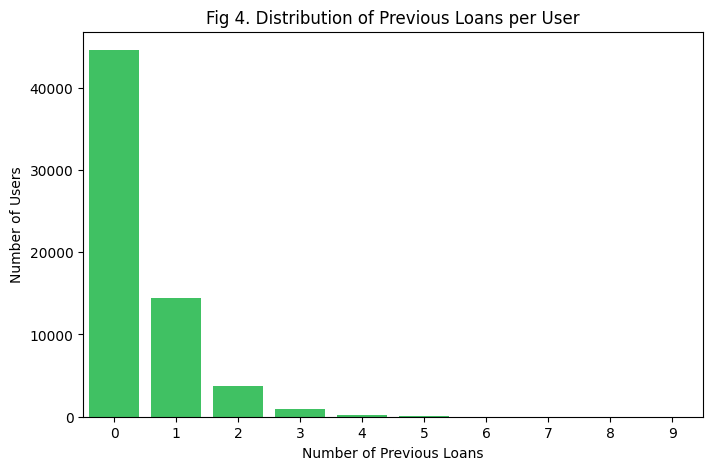

In [100]:

# Convert the column to integers for better visualization
merged_data['Previous_Loan_Count'] = merged_data['Previous_Loan_Count'].astype(int)

# Plot distribution of previous loan counts
plt.figure(figsize=(8, 5))

# Create count plot
ax = sns.countplot(x='Previous_Loan_Count', data=merged_data, color='#2bd659')

# Ensure all x-axis labels are shown
ax.set_xticks(sorted(merged_data['Previous_Loan_Count'].unique()))

# Customize the plot
plt.title("Fig 4. Distribution of Previous Loans per User", fontsize=12)
plt.xlabel("Number of Previous Loans", fontsize=10)
plt.ylabel("Number of Users", fontsize=10)

# Show the plot
plt.show()



> since our fig 2 has some users that have had more than 4 or 5 loans let's see in details how many users exactly fall in each number



In [101]:

# Filter users with 4 or more previous loans
high_loan_users = merged_data[merged_data['Previous_Loan_Count'] >= 4]

# Count the number of users for each loan count
loan_distribution = high_loan_users['Previous_Loan_Count'].value_counts().sort_index()
loan_distribution

,count
Previous_Loan_Count,
4,244
5,71
6,19
7,8
8,5
9,2




> There are outliers within the dataset—individuals who have taken out more than six loans in the past. These cases represent extreme borrowing behavior, which could indicate significant financial stress or an ongoing cycle of debt accumulation. Identifying such outliers is crucial for understanding patterns of excessive borrowing and for implementing strategies to mitigate potential risks associated with these individuals.



> let's see the amount of users that have had a loan a defaulter, knowing that our total of defaulters is 5,163



In [54]:
# Merge again to include the 'TARGET' column
merged_data = merged_data.merge(application_data[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')

# Filter users who had at least one previous loan
users_with_loans = merged_data[merged_data['Previous_Loan_Count'] > 0]

# Filter users who are also defaulters (TARGET = 1)
defaulters_with_loans = users_with_loans[users_with_loans['TARGET'] == 1]

# Count the number of such users
num_defaulters_with_loans = defaulters_with_loans.shape[0]

print(f"Number of users who had a loan and defaulted: {num_defaulters_with_loans}")


Number of users who had a loan and defaulted: 1625


In [88]:
#percentage of defaulters with recurrent loans

percentage = num_defaulters_with_loans/ application_data[application_data['TARGET'] ==1]['TARGET'].count()  * 100
print(f"Percentage of defaulters with recurrent loans: {percentage:.2f}%")

Percentage of defaulters with recurrent loans: 31.47%




> Approximately 31% of defaulters have a history of recurrent loans, indicating that a significant portion of individuals who default on loans have taken out multiple loans in the past. This recurring borrowing behavior among defaulters could suggest patterns of financial instability or challenges in managing debt. Understanding this relationship between loan recurrence and default status is crucial for developing more effective strategies to mitigate risks and manage credit more responsibly.



In [73]:
# Filter the rows where AMT_CREDIT > 0
credit_asked = previous_application[previous_application['AMT_CREDIT'] > 0]

# Calculate the average loan amount
average_loan_amount = credit_asked['AMT_CREDIT'].mean()

# Print the average loan amount
print(f"The average amount of loan asked is: {average_loan_amount:.2f}")


The average amount of loan asked is: 233746.52


In [86]:
print('Amount of users asking above 1 million', credit_asked[credit_asked['AMT_CREDIT'] > 1000000].shape)
print('Amount of users ', credit_asked.shape)

print('Percentage of users asking above 1 million', (credit_asked[credit_asked['AMT_CREDIT'] > 1000000].shape[0] / credit_asked.shape[0] * 100))

Amount of users asking above 1 million (5344, 37)
Amount of users  (121046, 37)
Percentage of users asking above 1 million 4.414850552682451


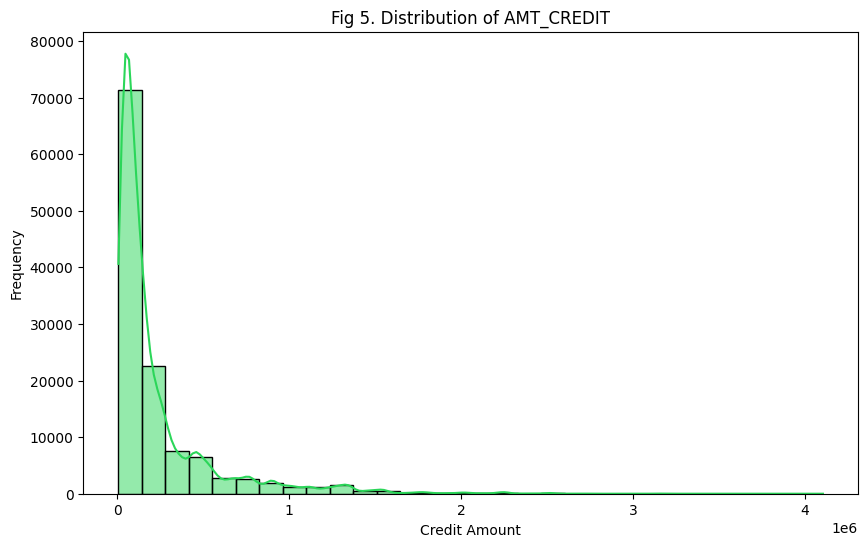

In [102]:
# Plot the distribution of AMT_CREDIT
plt.figure(figsize=(10, 6))

# Using seaborn's histplot to visualize the distribution
sns.histplot(credit_asked['AMT_CREDIT'], bins=30, kde=True, color='#2bd659')

# Customize the plot
plt.title("Fig 5. Distribution of AMT_CREDIT", fontsize=12)
plt.xlabel("Credit Amount", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Show the plot
plt.show()




> This distribution reveals that a significant portion of the population requests loan amounts in the thousands and higher, with most applicants seeking large sums, on average of $233,746.52, and almost 5%  of the users asking for + millions. This trend highlights the tendency for individuals to apply for substantial credit, potentially indicating a preference for more significant financial commitments or a need for more considerable funding.





In [77]:
# Calculate the average credit amount requested in the previous application
average_credit_application = previous_application['AMT_APPLICATION'].mean()

# Print the average credit amount
print(f"The average credit amount requested in the previous application is: {average_credit_application:.2f}")


The average credit amount requested in the previous application is: 169340.51


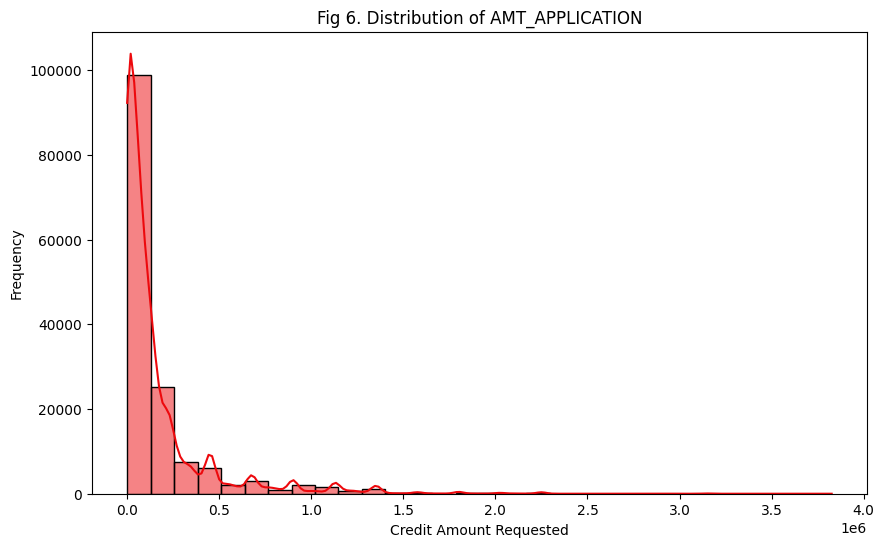

In [103]:
#For how much credit did client ask on the previous application


# Plot the distribution of AMT_APPLICATION
plt.figure(figsize=(10, 6))

# Using seaborn's histplot to visualize the distribution
sns.histplot(previous_application['AMT_APPLICATION'], bins=30, kde=True, color='#ed090d')

# Customize the plot
plt.title("Fig 6. Distribution of AMT_APPLICATION", fontsize=12)
plt.xlabel("Credit Amount Requested", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Show the plot
plt.show()





> The amount of credit requested by clients in the previous application (AMT_APPLICATION) exhibits a similar tendency to the AMT_CREDIT column, with both showing a concentration of applicants seeking large loan amounts, often in the thousands. This suggests a consistent trend in the financial behavior of clients, where substantial credit requests are common across both current and previous applications.





# 4. Preprocesing Steps

To decide whether previous_application or application_data is better suited for applying PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis), we need to consider the following:


1.Target Variable:
- LDA requires the target variable (class labels) for supervised learning, since application_data has the target variable, LDA would be more appropriate for that dataset.
- PCA is unsupervised, meaning it doesn’t require class labels, so either dataset can work for PCA.

2. Nature of Data:
- previous_application contains details about previous loans, including loan amounts, down payments, and other features related to previous loans, which could be relevant for understanding patterns based on the loan request and history.
- application_data contains broader financial and personal information (e.g., income, credit amount, annuity, children count) for each applicant and may offer a more diverse feature set.


Since PCA is often used to reduce dimensions in large datasets while retaining as much variance as possible. Given that application_data has broader features related to the applicant’s financial status it would be more suitable for PCA.

In [104]:
application_data[columns_to_keep_application].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64030 entries, 0 to 64029
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  64030 non-null  int64  
 1   TARGET                      64030 non-null  int64  
 2   FLAG_OWN_CAR                64030 non-null  object 
 3   FLAG_OWN_REALTY             64030 non-null  object 
 4   CNT_CHILDREN                64030 non-null  int64  
 5   AMT_INCOME_TOTAL            64030 non-null  float64
 6   AMT_CREDIT                  64030 non-null  float64
 7   AMT_ANNUITY                 64025 non-null  float64
 8   AMT_GOODS_PRICE             63979 non-null  float64
 9   DAYS_EMPLOYED               64030 non-null  int64  
 10  DAYS_REGISTRATION           64030 non-null  float64
 11  DAYS_ID_PUBLISH             64030 non-null  int64  
 12  AMT_REQ_CREDIT_BUREAU_HOUR  55430 non-null  float64
 13  AMT_REQ_CREDIT_BUREAU_DAY   554

## I. Missing Values

In [119]:
#make a copy of our df
df = application_data[columns_to_keep_application]

In [120]:
#Extract columns -- Impute numerical columns with their median or mean, and categorical with mode
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [121]:
numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [122]:
categorical_cols

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], dtype='object')

In [123]:
# Imputer for numerical features
numerical_imputer = SimpleImputer(strategy='median')  # You can also use 'mean'
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])


<ipython-input-123-ff9572fcfa29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])


In [124]:
# Imputer for categorical features (if needed)
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Mode for categorical features
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


<ipython-input-124-c20efdf40be9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


## II. Handle Categorical variables

In [125]:
#use label encoder for categorical variables
label_encoder = LabelEncoder()

In [126]:

# Label encode categorical columns that are binary (e.g., FLAG_OWN_CAR)
df['FLAG_OWN_CAR'] = label_encoder.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df['FLAG_OWN_REALTY'])


<ipython-input-126-e543a99463ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FLAG_OWN_CAR'] = label_encoder.fit_transform(df['FLAG_OWN_CAR'])
<ipython-input-126-e543a99463ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df['FLAG_OWN_REALTY'])


## III. Keep usefull Variables

In [127]:
X = df.drop(columns=['SK_ID_CURR', 'TARGET']) # Drop the ID column 'SK_ID_CURR'

y = df['TARGET']  # Keep 'TARGET' for LDA



## IV. Standardize the data

In [128]:
# Scaling the Data (Standardizing)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [129]:
#show values scaled
X_scaled


array([[-0.71778552,  0.66362469, -0.5791345 , ..., -0.26922012,
        -0.39591685, -0.43369767],
       [-0.71778552, -1.50687583, -0.5791345 , ..., -0.26922012,
        -0.39591685, -1.0010623 ],
       [ 1.39317383,  0.66362469, -0.5791345 , ..., -0.26922012,
        -0.39591685, -1.0010623 ],
       ...,
       [ 1.39317383,  0.66362469, -0.5791345 , ..., -0.26922012,
        -0.39591685, -1.0010623 ],
       [ 1.39317383,  0.66362469, -0.5791345 , ..., -0.26922012,
         1.34077945, -0.43369767],
       [ 1.39317383,  0.66362469, -0.5791345 , ..., -0.26922012,
        -0.39591685, -0.43369767]])

# PART 1



### I. Sample a subset of the data based on class label

In [135]:
# Check the unique values in the TARGET column
print(y.unique())

# Check the distribution of classes in the TARGET column
print(y.value_counts())


[1. 0.]
TARGET
0.0    58867
1.0     5163
Name: count, dtype: int64


>To apply LDA, it is essential to have a balanced representation of both classes. You can either undersample the majority class (0.0) or oversample the minority class (1.0) using techniques like SMOTE (Synthetic Minority Over-sampling Technique).





In [150]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)




In [151]:
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y_train_balanced:", y_train_balanced.shape)


Shape of X_scaled: (64030, 16)
Shape of y_train_balanced: (82440,)


In [152]:
# If y_train_balanced is a different length than X_scaled, align them
y_train_balanced = y_train_balanced[:X_scaled.shape[0]]  # Adjust to match the length of X_scaled
X_scaled

array([[-0.71778552,  0.66362469, -0.5791345 , ..., -0.26922012,
        -0.39591685, -0.43369767],
       [-0.71778552, -1.50687583, -0.5791345 , ..., -0.26922012,
        -0.39591685, -1.0010623 ],
       [ 1.39317383,  0.66362469, -0.5791345 , ..., -0.26922012,
        -0.39591685, -1.0010623 ],
       ...,
       [ 1.39317383,  0.66362469, -0.5791345 , ..., -0.26922012,
        -0.39591685, -1.0010623 ],
       [ 1.39317383,  0.66362469, -0.5791345 , ..., -0.26922012,
         1.34077945, -0.43369767],
       [ 1.39317383,  0.66362469, -0.5791345 , ..., -0.26922012,
        -0.39591685, -0.43369767]])

### II. Apply PCA and LDA and visualize the results

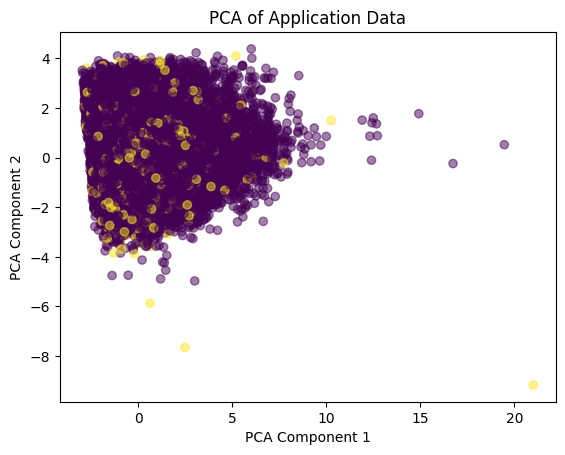

In [132]:
# PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)


# Visualize PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA of Application Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [156]:
X_pca

array([[-0.7367768 , -0.36324167],
       [ 2.30379156, -0.91259883],
       [-1.87031339, -1.0018198 ],
       ...,
       [ 1.81316725,  0.32867655],
       [ 1.57033198, -0.944622  ],
       [ 3.86420473,  0.26604526]])

In [153]:

# Apply LDA with 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y_train_balanced)


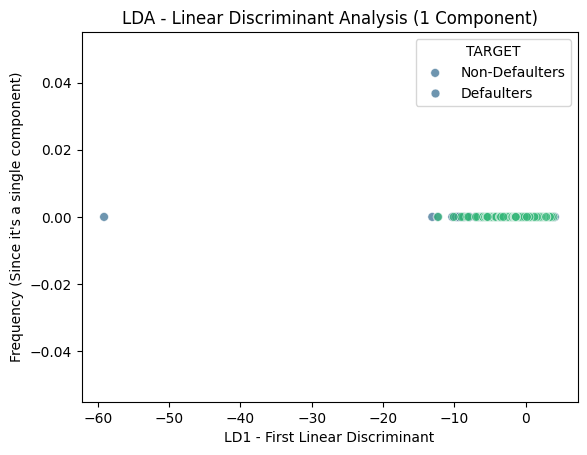

In [155]:


# Create the scatter plot for the 1D projection of the LDA
sns.scatterplot(x=X_lda[:, 0], y=[0]*len(X_lda), hue=y_train_balanced, palette="viridis", s=40, alpha=0.7)

# Customize the plot
plt.title("LDA - Linear Discriminant Analysis (1 Component)", fontsize=12)
plt.xlabel("LD1 - First Linear Discriminant", fontsize=10)
plt.ylabel("Frequency (Since it's a single component)", fontsize=10)
plt.legend(title='TARGET', loc='upper right', labels=["Non-Defaulters", "Defaulters"])

# Show the plot
plt.show()





## III. Perform classification using naïve Bayes and interpret the results



## IV. Perform classification using Logistic Regression and interpret the results

5. Perform classification using SVMs and interpret the results

6. Comment on which approaches might allow you to best identify the confidence of class assignments (e.g. how happy, or how sad rather than just a label)

7. Plot results based on the approach in 6.

# PART 2

## 1. Apply PCA and LDA. For PCA, plot the incremental gain in capturing the variance in the data for each successive principal component that is added and compare this with the subset of data in step 1.

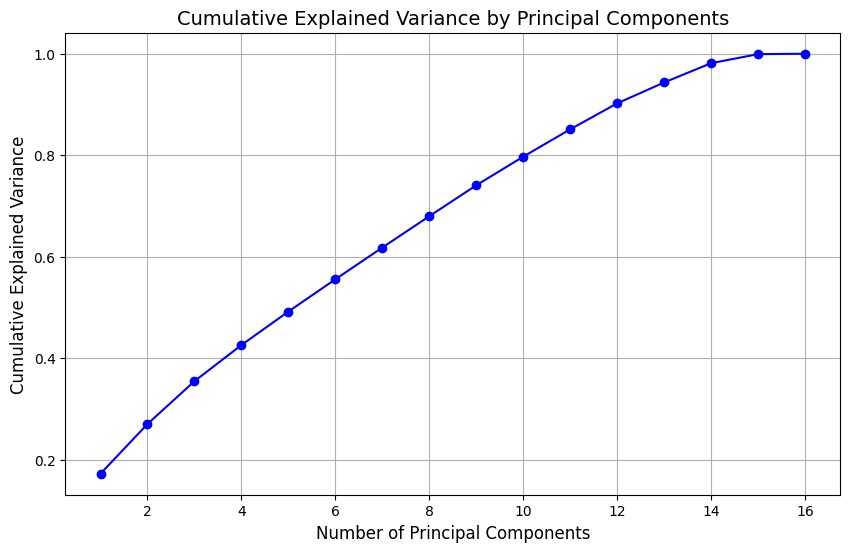

In [157]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to the scaled data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the incremental gain in capturing the variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', color='b')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.show()


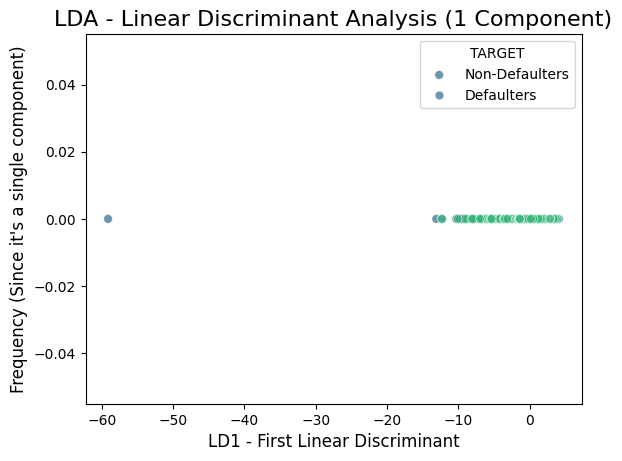

In [158]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA with 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y_train_balanced)

# Create the scatter plot for the 1D projection of the LDA
sns.scatterplot(x=X_lda[:, 0], y=[0]*len(X_lda), hue=y_train_balanced, palette="viridis", s=40, alpha=0.7)

# Customize the plot
plt.title("LDA - Linear Discriminant Analysis (1 Component)", fontsize=16)
plt.xlabel("LD1 - First Linear Discriminant", fontsize=12)
plt.ylabel("Frequency (Since it's a single component)", fontsize=12)
plt.legend(title='TARGET', loc='upper right', labels=["Non-Defaulters", "Defaulters"])

# Show the plot
plt.show()
